In [ ]:
!python --version

Python 3.10.12


# data-science-modelo-regressao-linear-assimetria-statsmodel

# Conhecendo o Dataset
---

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [ ]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [ ]:
caminho = 'https://raw.githubusercontent.com/bruno-kalel/regressao-linear-multipla-tratamento-assimetria/main/regressao-linear-multipla-tratamento-assimetria.csv'

In [ ]:
dados = pd.read_csv(caminho, sep=';')

In [ ]:
dados.columns = dados.columns.str.lower()

## Visualizar os dados

In [ ]:
dados.head(10)

,valor,area,dist_praia,dist_farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374
5,1449993,143,5.119767,0.043398
6,464000,107,7.846771,0.157954
7,1050000,87,0.190406,0.555212
8,1580000,155,2.241815,0.001266
9,4200000,348,0.105480,0.854900


## Verificando o tamanho do dataset

In [ ]:
dados.shape

(5000, 4)

# Análises Preliminares
---

## Estatísticas descritivas

In [ ]:
dados.describe()

,valor,area,dist_praia,dist_farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr()

,valor,area,dist_praia,dist_farmacia
valor,1.000000,0.710974,-0.366542,-0.024366
area,0.710974,1.000000,-0.283371,-0.030990
dist_praia,-0.366542,-0.283371,1.000000,0.025645
dist_farmacia,-0.024366,-0.030990,0.025645,1.000000


# Comportamento da Variável Dependente (Y)
---

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [ ]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'preço dos imóveis'}, xlabel='reais'>

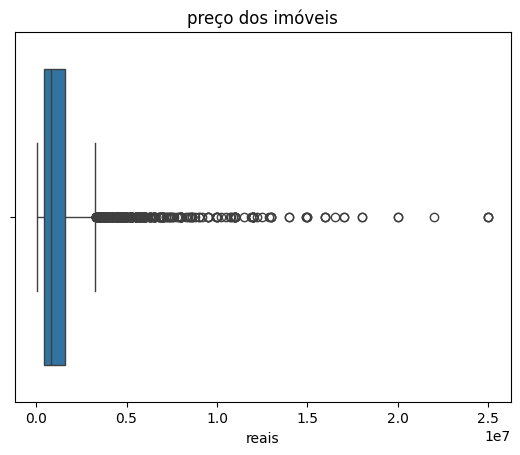

In [ ]:
ax = sns.boxplot(data=dados['valor'], orient='h')
ax.set_title('preço dos imóveis')
ax.set_xlabel('reais')
ax

# Distribuição de Frequências
---

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'distribuição de frequências'}, xlabel='preço dos imóveis (r$)', ylabel='Count'>

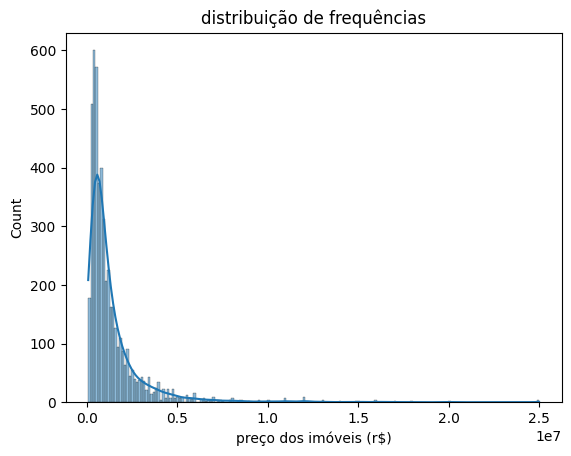

In [ ]:
ax = sns.histplot(dados['valor'], kde=True)
ax.set_title('distribuição de frequências')
ax.set_xlabel('preço dos imóveis (r$)')
ax

# Dispersão Entre as Variáveis
---

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

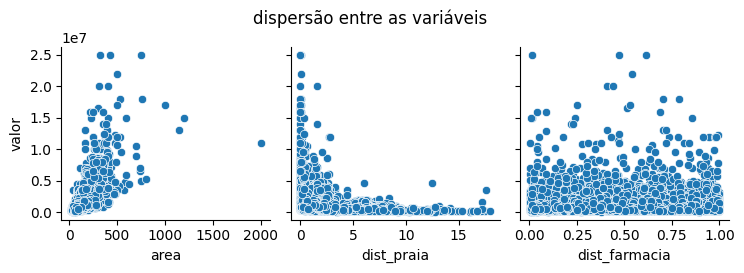

In [ ]:
ax = sns.pairplot(dados, y_vars='valor', x_vars=['area', 'dist_praia', 'dist_farmacia'])
ax.fig.suptitle('dispersão entre as variáveis', y=1.05)
ax

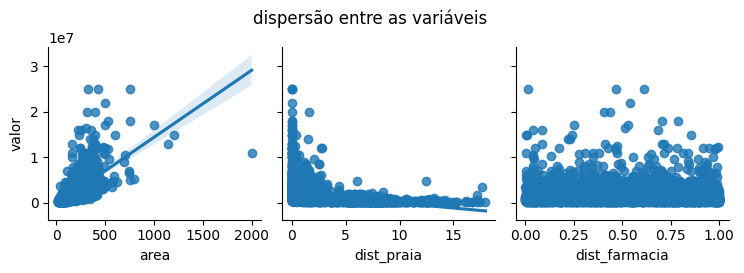

In [ ]:
ax = sns.pairplot(dados, y_vars='valor', x_vars=['area', 'dist_praia', 'dist_farmacia'], kind='reg')
ax.fig.suptitle('dispersão entre as variáveis', y=1.05)
ax

# Transformando os Dados
---

## Distribuição Normal
<hr>

### Por quê?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [ ]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [ ]:
np.log(1), np.log(0)

<ipython-input-69-8a4b282c6551>:1: RuntimeWarning: divide by zero encountered in log
  np.log(1), np.log(0)


(0.0, -inf)

Do autor:
* Como a variável apresenta valores zero em alguns registros, a forma mais correta de transformação é adicionando uma constante, diferente de zero, aos dados, para evitar perda de informação, visto que log(0) não existe.

In [ ]:
dados['log_valor'] = np.log(dados['valor'])
dados['log_area'] = np.log(dados['area'])

# como alguns dados de distância possuem valor 0
# e o log de 0 é -infinito
# realizamos o log somando o valor da coluna somado a 1
# assim, não temos erro e o valor continua 0
# visto que log(1) = 0
# :D
dados['log_dist_praia'] = np.log(dados['dist_praia'] + 1)
dados['log_dist_farmacia'] = np.log(dados['dist_farmacia'] + 1)

In [ ]:
dados.head(10)

,valor,area,dist_praia,dist_farmacia,log_valor,log_area,log_dist_praia,log_dist_farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946
5,1449993,143,5.119767,0.043398,14.187069,4.962845,1.811524,0.042483
6,464000,107,7.846771,0.157954,13.047640,4.672829,2.180053,0.146655
7,1050000,87,0.190406,0.555212,13.864301,4.465908,0.174295,0.441612
8,1580000,155,2.241815,0.001266,14.272935,5.043425,1.176133,0.001265
9,4200000,348,0.105480,0.854900,15.250595,5.852202,0.100280,0.617831


## Distribuição de frequências da variável *dependente transformada* (y)

<Axes: title={'center': 'distribuição de frequências'}, xlabel='log do preço dos imóveis', ylabel='Count'>

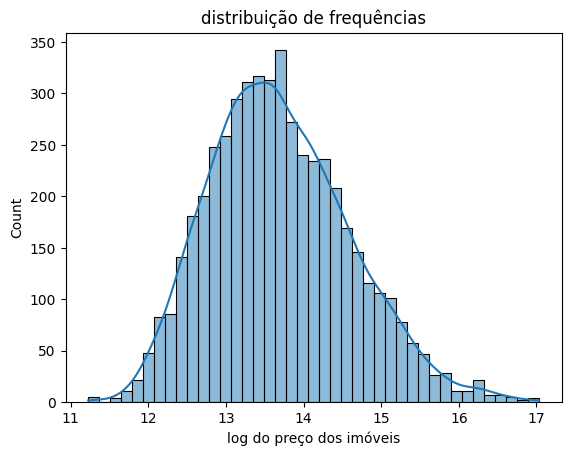

In [ ]:
ax = sns.histplot(dados['log_valor'], kde=True)
ax.set_title('distribuição de frequências')
ax.set_xlabel('log do preço dos imóveis')
ax

# Verificando Relação Linear
---

## Gráficos de dispersão entre as variáveis transformadas do dataset

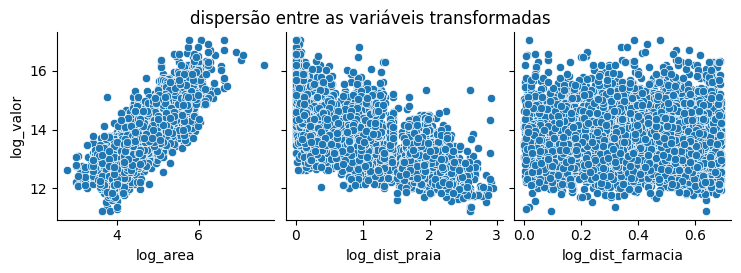

In [ ]:
ax = sns.pairplot(dados, y_vars='log_valor', x_vars=['log_area', 'log_dist_praia', 'log_dist_farmacia'])
ax.fig.suptitle('dispersão entre as variáveis transformadas', y=1.05)
ax

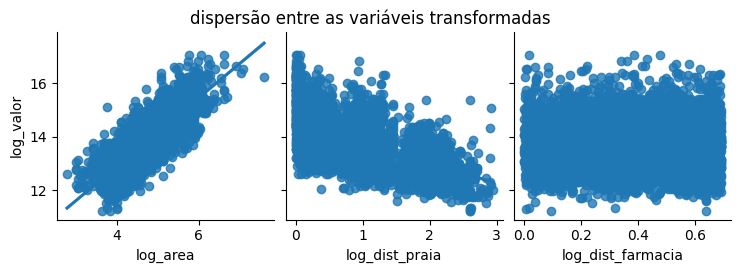

In [ ]:
ax = sns.pairplot(dados, y_vars='log_valor', x_vars=['log_area', 'log_dist_praia', 'log_dist_farmacia'], kind='reg')
ax.fig.suptitle('dispersão entre as variáveis transformadas', y=1.05)
ax

# Criando os *Datasets* de Treino e Teste
---

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [ ]:
y = dados['log_valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
x = dados[['log_area', 'log_dist_praia', 'log_dist_farmacia']]

## Criando os datasets de treino e de teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O scikit-learn é um módulo Python especializado em soluções para machine learning.</p>



## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [ ]:
x_train_com_constante = sm.add_constant(x_train)

In [ ]:
modelo_sm = sm.OLS(y_train, x_train_com_constante, hasconst=True).fit()

# Avaliando o Modelo Estimado
---

## Avaliando as estatísticas de teste do modelo

In [ ]:
modelo_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:13:31   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_area              1.0580      0.012     89.320      0.000       1.035       1.081
log_dist_praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_dist_farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do autor:
* O teste F é utilizado para testar simultaneamente a significância de um conjunto de parâmetros. Testa a hipótese de todos os coeficientes da regressão serem iguais a zero. (Prob (F-statistic) <= 0.05 (OK))
* O teste t é utilizado para testar a significância de cada parâmetro individualmente.Testa a hipótese de o coeficiente ser igual a zero. (P>|t| <= 0.05 (OK))

# Modificando o Modelo e Avaliando Novamente o Ajuste
---

## Criando um novo conjunto de variáveis explicativas (X)

In [ ]:
x = dados[['log_area', 'log_dist_praia']]

## Criando os datasets de treino e de teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [ ]:
x_train_com_constante = sm.add_constant(x_train)

In [ ]:
modelo_sm = sm.OLS(y_train, x_train_com_constante, hasconst=True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [ ]:
modelo_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:13:31   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_area           1.0581      0.012     89.345      0.000       1.035       1.081
log_dist_praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Estimando o Modelo com os Dados de Treino
---

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(x_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
f'R² = {modelo.score(x_train, y_train)}'

'R² = 0.8048773977172844'

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
f'R² = {metrics.r2_score(y_test, y_previsto)}'

'R² = 0.7904430508603385'

# Obtendo Previsões Pontuais
---

## Dados de entrada

In [ ]:
entrada = x_test[0:1]
entrada

,log_area,log_dist_praia
1006,5.273,1.282769


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)

array([14.28482006])

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [ ]:
np.exp(modelo.predict(entrada))

array([1598889.78477944])

Do autor:
* A função exponencial é a inversa da logarítmica natural que utilizamos em nossos dados para solucionar um problema de assimetria.

# Interpretação dos Coeficientes Estimados
---

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [ ]:
modelo.intercept_

9.33491640980033

In [ ]:
np.exp(modelo.intercept_)

11326.681428069862

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [ ]:
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [ ]:
x.columns

Index(['log_area', 'log_dist_praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
index = ['intercepto', 'área (log)', 'distância até a praia (log)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['parâmetros'])

,parâmetros
intercepto,9.334916
área (log),1.058078
distância até a praia (log),-0.490612


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# Análises Gráficas dos Resultados do Modelo
---

## Gerando as previsões do modelo para os dados de TREINO

In [ ]:
y_previsto_train = modelo.predict(x_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'previsão x real'}, xlabel='log do preço - previsão', ylabel='log do preço - real'>

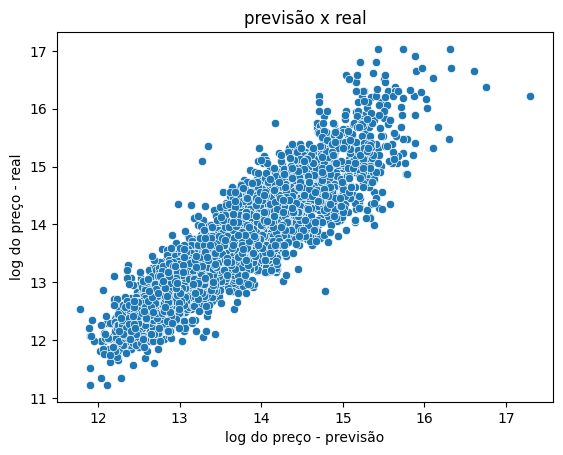

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.set_title('previsão x real')
ax.set_xlabel('log do preço - previsão')
ax.set_ylabel('log do preço - real')
ax

## Obtendo os resíduos

In [ ]:
resíduo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'distribuição de frequências dos resíduos'}, xlabel='log do preço', ylabel='Count'>

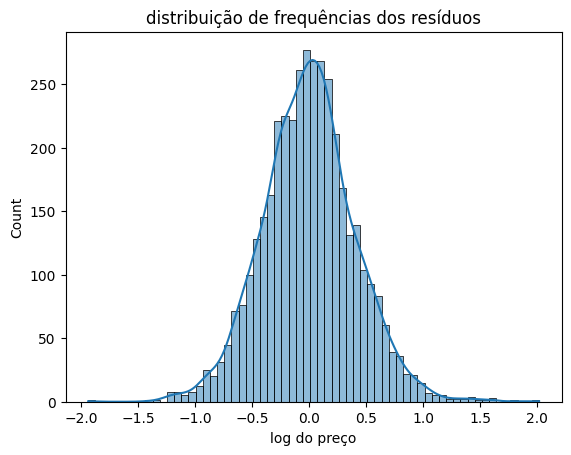

In [ ]:
ax = sns.histplot(resíduo, kde=True)
ax.set_title('distribuição de frequências dos resíduos')
ax.set_xlabel('log do preço')
ax